In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans


In [4]:
countriesData = pd.read_csv('Country-data.csv')
countriesData


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
countriesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
countriesData.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [12]:
countriesData.nlargest(10, ['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600


In [13]:
countriesData.nsmallest(10, ['life_expec'])


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


In [5]:
countriesData.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

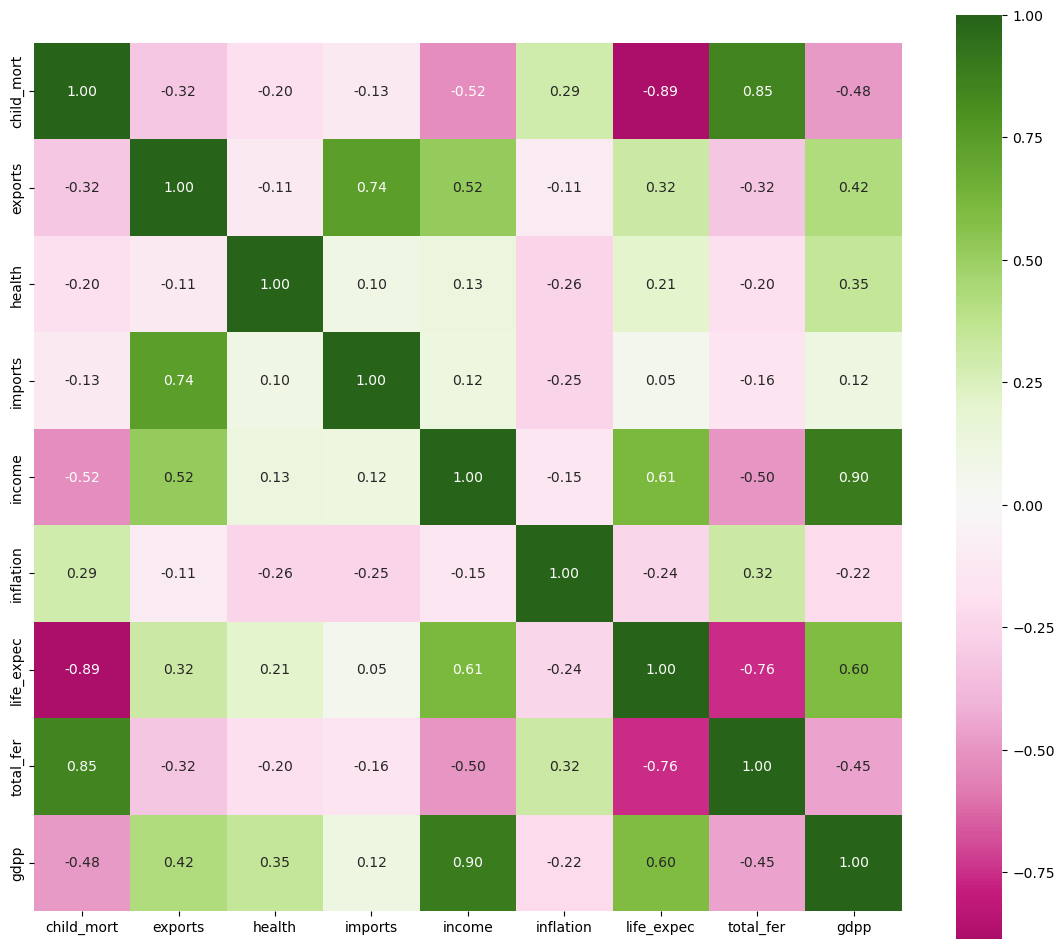

In [15]:
corrs = countriesData.corr()
plt.figure(figsize=(14,12))
cmap = sns.color_palette("PiYG", as_cmap=True)
h1 = sns.heatmap(corrs, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

<AxesSubplot:xlabel='health'>

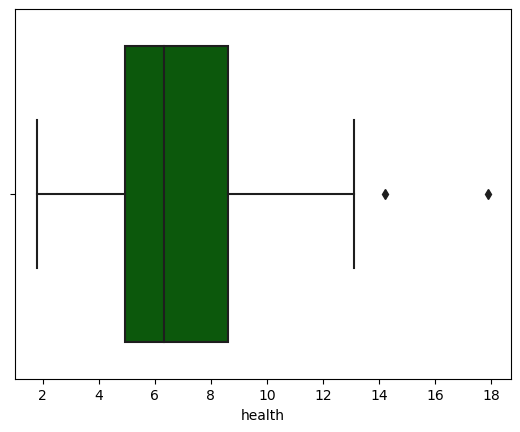

In [18]:
sns.boxplot(x=countriesData['health'], color = 'darkgreen')

<AxesSubplot:xlabel='health', ylabel='Count'>

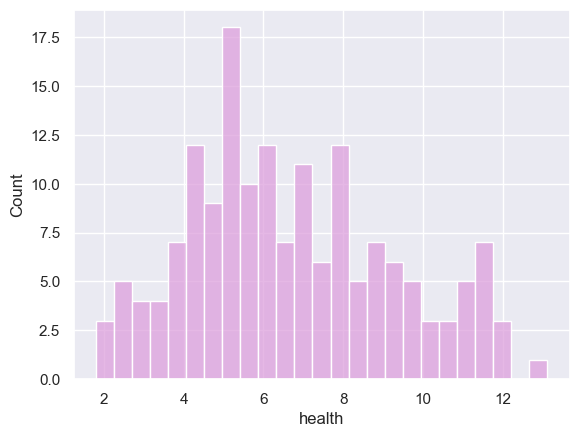

In [19]:
healthData = countriesData[countriesData['health']<14]
sns.set(style="darkgrid")
sns.histplot(data=healthData, x='health', color="plum", bins = 25)

<AxesSubplot:xlabel='inflation', ylabel='Count'>

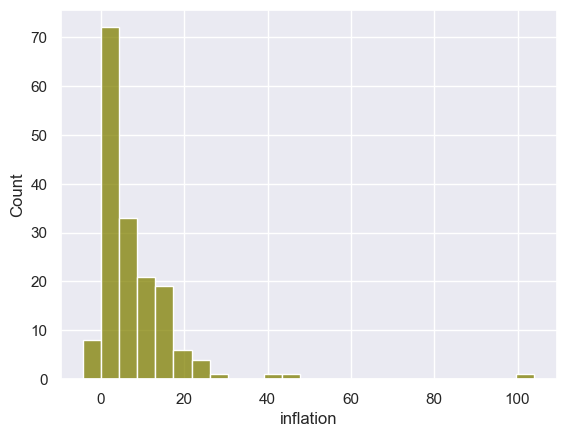

In [20]:
inflData = countriesData['inflation']
sns.set(style="darkgrid")
sns.histplot(data=inflData, color="olive", bins = 25)

<AxesSubplot:xlabel='inflation', ylabel='Count'>

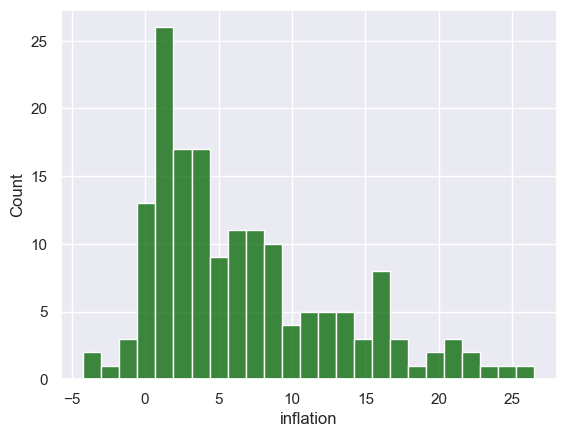

In [21]:
inflData = countriesData[countriesData['inflation']<35]
sns.set(style="darkgrid")
sns.histplot(data=inflData,  x="inflation", color="darkgreen", bins = 25)

<AxesSubplot:xlabel='gdpp', ylabel='Count'>

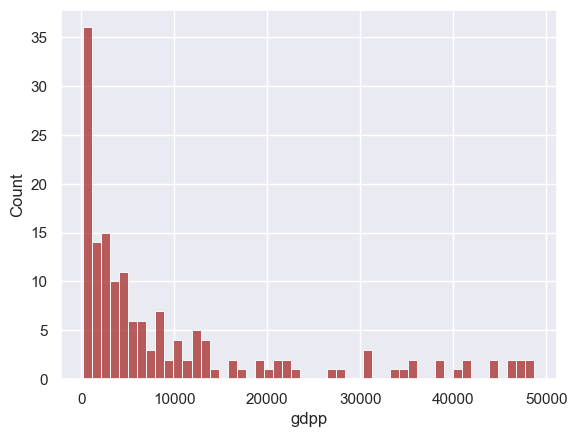

In [23]:
gdppData = countriesData[countriesData['gdpp'] < 50000]
sns.histplot(data=gdppData, x="gdpp", color="brown", bins = 50)

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

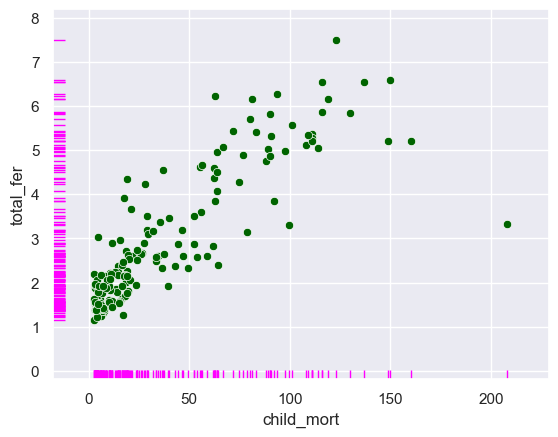

In [26]:
sns.scatterplot(data = countriesData, x = "child_mort", y = "total_fer", color = 'darkgreen')
sns.rugplot(data = countriesData, x = "child_mort", y = "total_fer", color = 'fuchsia')

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

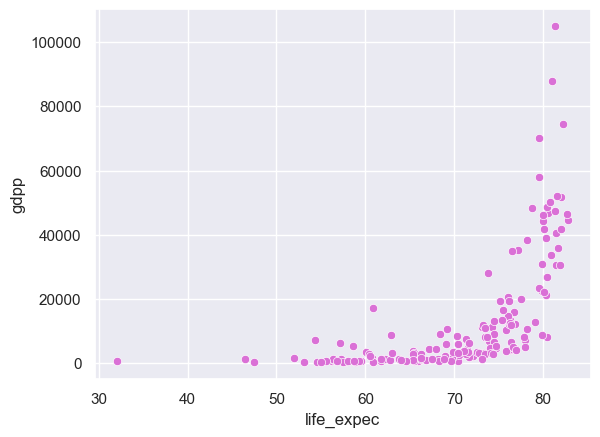

In [28]:
sns.scatterplot(data=countriesData, x="life_expec", y="gdpp", color = 'orchid')

<AxesSubplot:xlabel='income', ylabel='gdpp'>

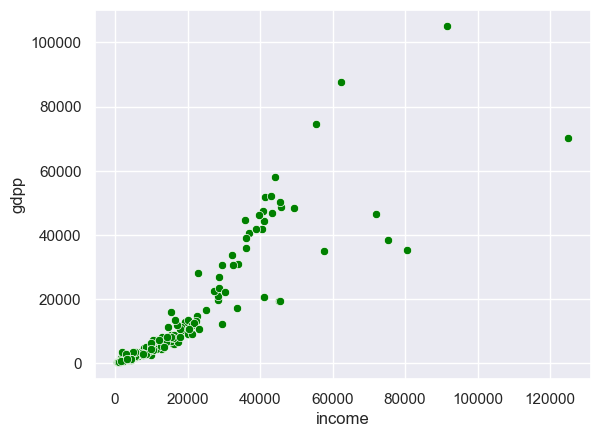

In [29]:
sns.scatterplot(data=countriesData, x="income", y="gdpp", color = 'green')

<AxesSubplot:xlabel='exports', ylabel='imports'>

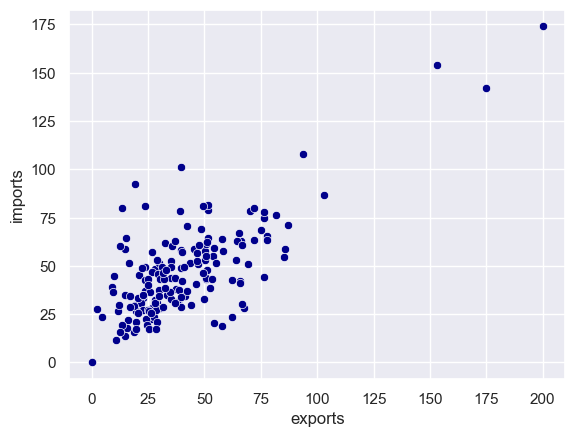

In [30]:
sns.scatterplot(data=countriesData, x="exports", y="imports",color = 'darkblue')

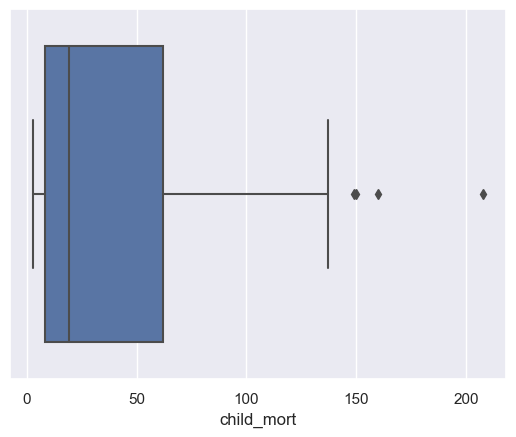

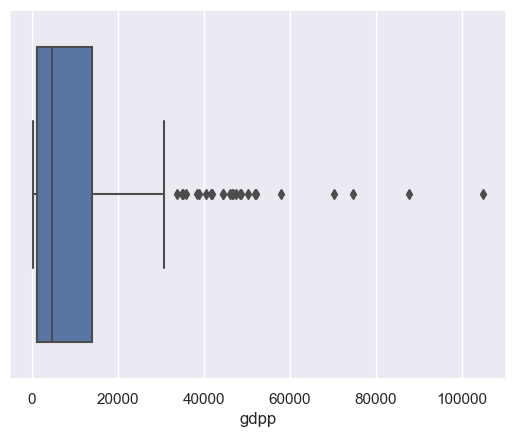

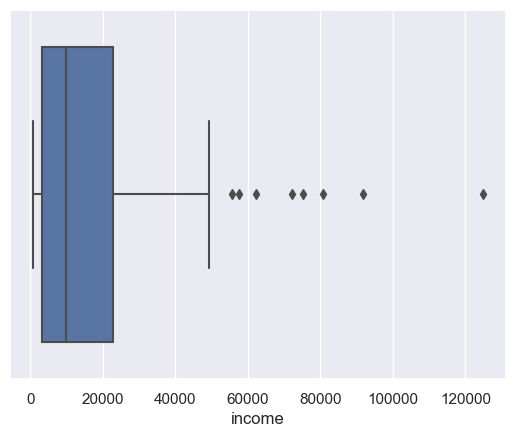

In [31]:
fig = plt.figure()
sns.boxplot(x=countriesData['child_mort'])
plt.show()
sns.boxplot(x=countriesData['gdpp'])
plt.show()
sns.boxplot(x=countriesData['income'])
plt.show()

In [6]:
clearData = countriesData[["country",'gdpp','child_mort','income']]
clearData = clearData[clearData['gdpp'] < 50000]
clearData = clearData[clearData['child_mort'] < 140]
clearData = clearData[clearData['income'] < 50000]
clearData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   gdpp        151 non-null    int64  
 2   child_mort  151 non-null    float64
 3   income      151 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 5.9+ KB


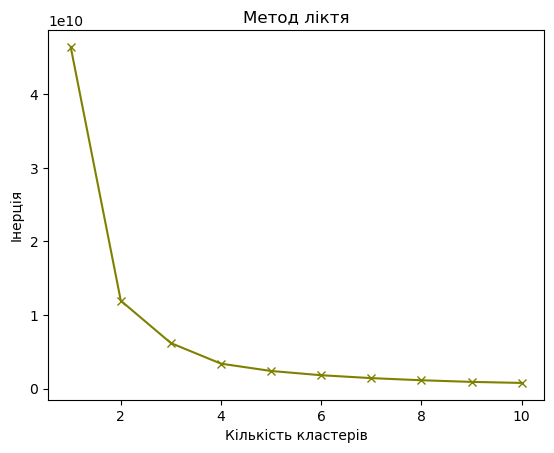

In [7]:

klst = list(zip(clearData["gdpp"], clearData["income"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klst)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='x', color = 'olive')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()

In [8]:
clearData.nsmallest(5, ['income', 'gdpp'])

,country,gdpp,child_mort,income
37,"Congo, Dem. Rep.",334,116.0,609
88,Liberia,327,89.3,700
26,Burundi,231,93.6,764
112,Niger,348,123.0,814
106,Mozambique,419,101.0,918


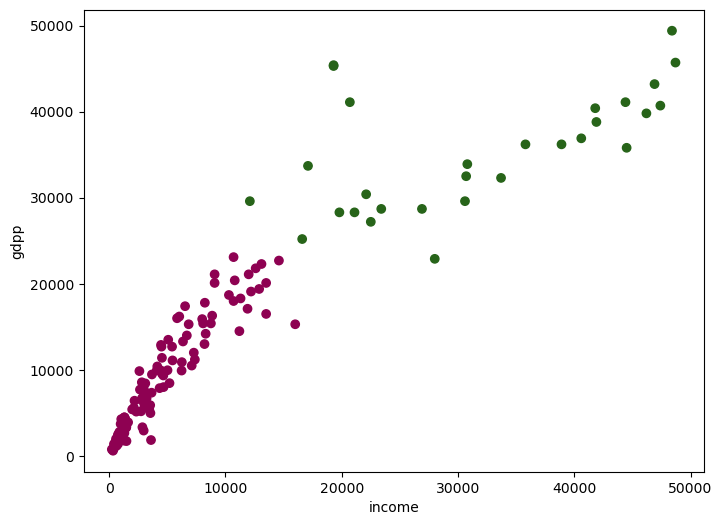

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(klst)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(clearData["gdpp"], clearData["income"], c=kmeans.labels_, cmap='PiYG')
ax.set_xlabel('income')
ax.set_ylabel('gdpp')
plt.show()

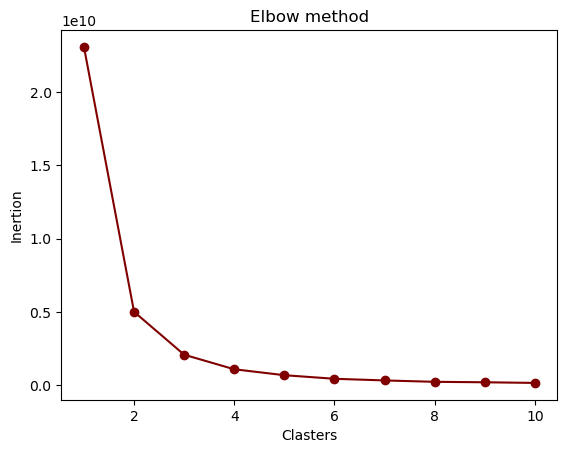

In [14]:
klaster2 = list(zip(clearData["gdpp"], clearData["child_mort"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klaster2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o', color='maroon')
plt.title('Elbow method')
plt.xlabel('Clasters')
plt.ylabel('Inertion')
plt.show()

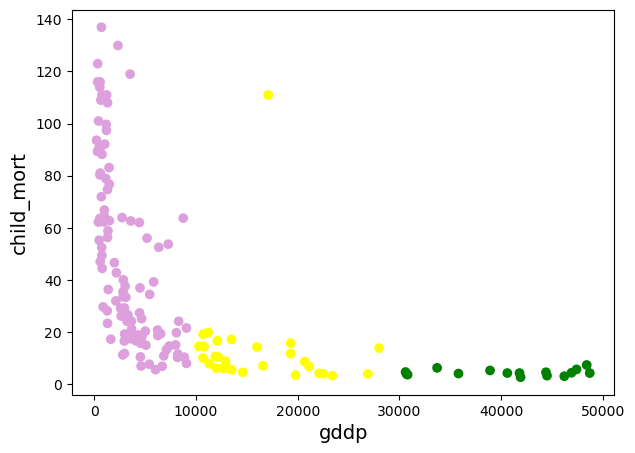

In [19]:

kmeans = KMeans(n_clusters=3) #не вдається підвантажити KneeLocator, тому виділяю кластери для трьох рівнів розвитку країн
kmeans.fit(klaster2)
customcmap = ListedColormap(["plum", "green", "yellow"])
fig, ax = plt.subplots(figsize=(7, 5))
plt.scatter(clearData["gdpp"], clearData["child_mort"], c=kmeans.labels_, cmap = customcmap)
ax.set_xlabel('gddp', fontsize=14)
ax.set_ylabel('child_mort', fontsize=14)
plt.show()

In [23]:
badCount = clearData[["country"]]
badCount=pd.merge(badCount,CI, left_index=True,right_index=True)
badCount.nsmallest(5, ['income', 'child_mort'])

,country,child_mort,income,cluster
37,"Congo, Dem. Rep.",116.0,609,0
88,Liberia,89.3,700,0
26,Burundi,93.6,764,0
112,Niger,123.0,814,0
106,Mozambique,101.0,918,0


In [24]:
badCount['cluster'].value_counts(normalize=True)

2    0.529801
0    0.324503
1    0.145695
Name: cluster, dtype: float64

In [25]:
#дивимось загальні дані по кластерах
Cluster_child_mort=pd.DataFrame(CI.groupby(["cluster"]).child_mort.mean())
Cluster_income=pd.DataFrame(CI.groupby(["cluster"]).income.mean())
CMI = pd.concat([Cluster_child_mort,Cluster_income], axis=1)
CMI.columns = ["child_mort","income"]
CMI

,child_mort,income
cluster,,
0,78.665306,2487.653061
1,41.186364,10560.454545
2,11.185000,21370.000000


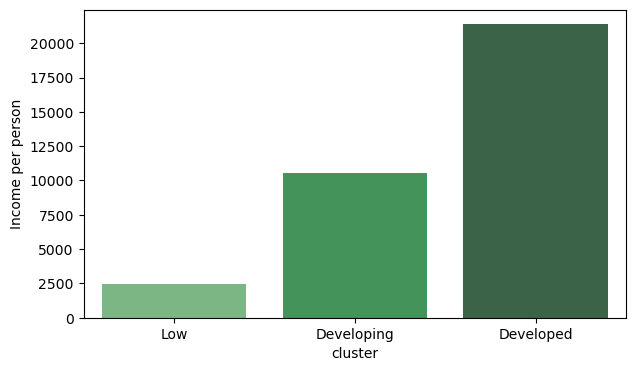

In [53]:
fig = plt.figure(figsize = (7,4))
CMI.rename(index={2: 'Developed'},inplace=True)
CMI.rename(index={1: 'Developing'},inplace=True)
CMI.rename(index={0: 'Low'},inplace=True)
s=sns.barplot(x=CMI.index,y='income',data=CMI, palette="Greens_d")
plt.ylabel('Income per person', fontsize=10)
plt.show()

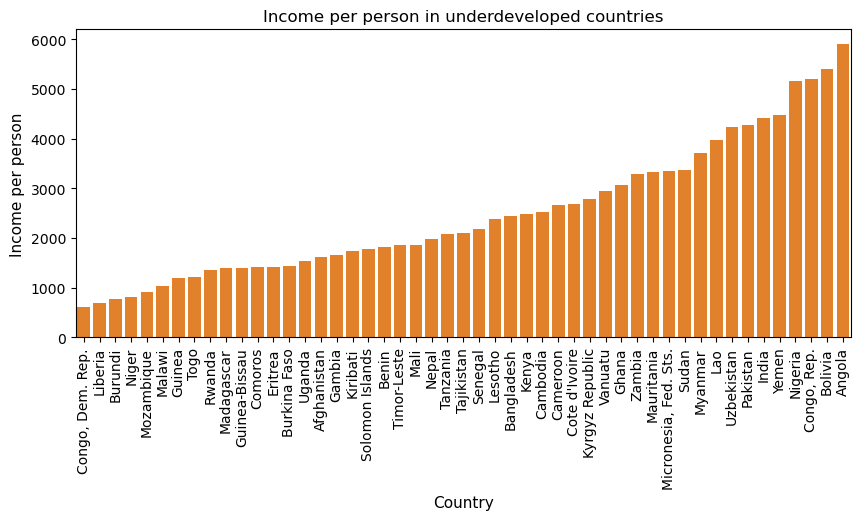

In [54]:
badCon=badCount[badCount['cluster']==0]
normCon=badCount[badCount['cluster']==1]
greatCon=badCount[badCount['cluster']==2]

badCon=badCon.sort_values(by = 'income')

fig = plt.figure(figsize = (10,4))
s=sns.barplot(x='country',y='income',data=badCon, color='C1')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=11)
plt.ylabel('Income per person', fontsize=11)
plt.title('Income per person in underdeveloped countries')
plt.show()